In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
registration_df = pd.read_csv("data/registration_data_training.csv")
columns_to_drop = ['registration_platform_specific', 'registration_country', 'registration_store', 'registration_channel_detailed', 'registration_device_type', 'registration_device_manufacturer', 'avg_age_top_11_players',
                   'registration_season_day', 'tokens_bought', 'avg_stars_top_11_players', 'number_of_devices_used', 'transaction_count_iap', 'user_id', 'registration_time_utc']
registration_df["playtime"] = registration_df["playtime"] / (1000 * 60)
registration_df["money_stash"] = registration_df["money_stash"] / 1000000

registration_df = registration_df.drop(columns=columns_to_drop)
registration_df.head()

,session_count,playtime,total_match_played_count,total_match_won_count,total_match_watched_count,transaction_count_rewarded_video,tokens_spent,tokens_stash,rests_stash,rests_spent,treatments_spent,morale_spent,money_stash,avg_stars_top_3_players,training_count,days_active_first_28_days_after_registration
0,1,2.351033,2,1,0,0,0,114,524,0,0,0,1066.076772,5.451511,0,0
1,1,8.695900,0,0,0,0,0,157,962,0,0,0,1224.446429,5.303822,1,0
2,2,28.386383,0,0,0,0,20,232,829,0,0,0,1221.792142,5.746889,3,0
3,4,53.028333,3,2,1,0,79,8,180,39,12,9,928.112709,6.692578,7,1
4,5,97.782017,1,0,1,0,77,70,209,80,0,2,326.553498,5.775289,6,3


In [3]:
print(registration_df.describe())

             user_id  session_count      playtime  total_match_played_count  \
count   50000.000000   50000.000000  50000.000000              50000.000000   
mean   109844.239100       2.254440     32.315468                  1.013760   
std     63219.003941       2.107337     40.880019                  1.624298   
min         5.000000       0.000000      0.000000                  0.000000   
25%     55070.750000       1.000000      5.878342                  0.000000   
50%    109571.000000       2.000000     19.197433                  1.000000   
75%    165091.750000       3.000000     43.483663                  1.000000   
max    218956.000000      52.000000    969.559767                 29.000000   

       total_match_won_count  total_match_watched_count  \
count           50000.000000               50000.000000   
mean                0.709820                   0.358140   
std                 1.223685                   0.951953   
min                 0.000000                   0.000

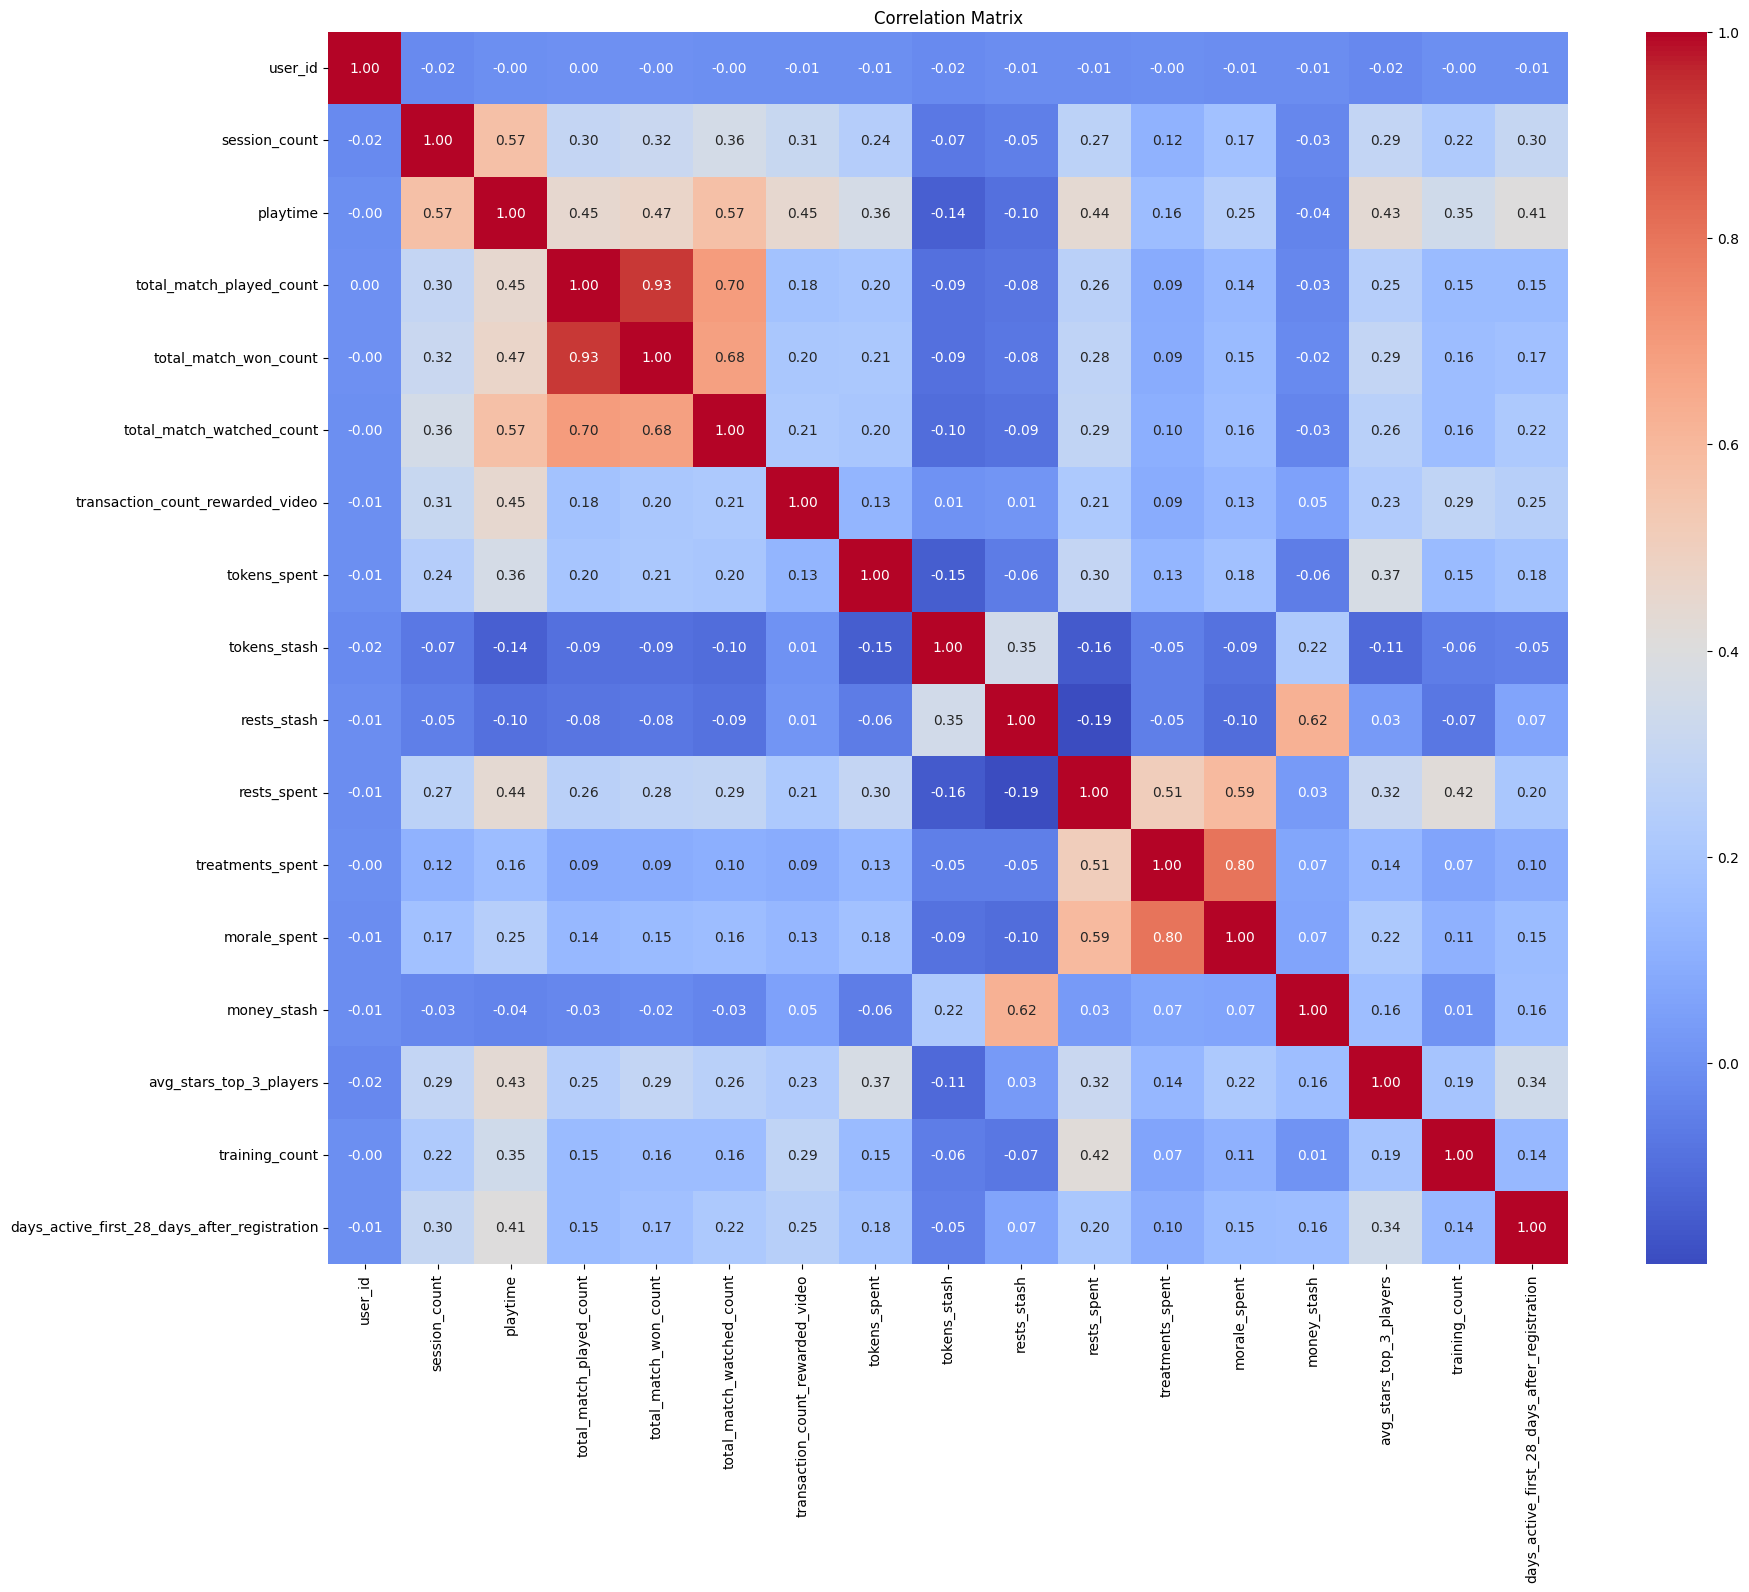

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtriraj samo numeričke kolone
numeric_df = registration_df.select_dtypes(include=["number"])

# Kreiraj grafikon matrice korelacije
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
columns_to_drop = ['user_id', 'registration_time_utc']
registration_df.drop(columns=columns_to_drop)



,session_count,playtime,total_match_played_count,total_match_won_count,total_match_watched_count,transaction_count_rewarded_video,tokens_spent,tokens_stash,rests_stash,rests_spent,treatments_spent,morale_spent,money_stash,avg_stars_top_3_players,training_count,days_active_first_28_days_after_registration
0,1,2.351033,2,1,0,0,0,114,524,0,0,0,1066.076772,5.451511,0,0
1,1,8.695900,0,0,0,0,0,157,962,0,0,0,1224.446429,5.303822,1,0
2,2,28.386383,0,0,0,0,20,232,829,0,0,0,1221.792142,5.746889,3,0
3,4,53.028333,3,2,1,0,79,8,180,39,12,9,928.112709,6.692578,7,1
4,5,97.782017,1,0,1,0,77,70,209,80,0,2,326.553498,5.775289,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,40.668633,1,1,0,4,181,8,622,103,0,10,258.337268,6.038222,7,10
49996,2,13.240983,1,1,0,0,1,194,267,0,0,0,1346.944347,6.129333,5,0
49997,1,24.279567,1,0,0,2,61,26,601,179,187,68,1049.928950,5.737466,0,27
49998,3,33.607533,1,1,0,0,15,111,525,0,9,0,1287.003702,5.835422,3,23


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Pretpostavljamo da je expanded_registration_df već pripremljen i da sadrži ciljnu promenljivu
# Ciljna promenljiva
target = 'days_active_first_28_days_after_registration'

# Podela na ulazne i ciljnu promenljivu
X = registration_df.drop(columns=[target])  # Svi atributi osim ciljne promenljive
y = registration_df[target]

# Podela na trening i validacioni skup (80:20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Kreiranje XGBoost modela
xgb_model = XGBRegressor(
    tree_method="hist",
    eval_metric=mean_absolute_error,
)

# Treniranje modela
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
)

# Predikcija na validacionom skupu
y_pred = xgb_model.predict(X_val)

y_pred = np.clip(y_pred, 0, 28)

# Evaluacija - MAE
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error (MAE) on validation set: {mae:.2f}")


[0]	validation_0-rmse:8.87117	validation_0-mean_absolute_error:7.37817
[1]	validation_0-rmse:8.47814	validation_0-mean_absolute_error:6.94056
[2]	validation_0-rmse:8.27145	validation_0-mean_absolute_error:6.65160
[3]	validation_0-rmse:8.16689	validation_0-mean_absolute_error:6.45763
[4]	validation_0-rmse:8.10705	validation_0-mean_absolute_error:6.32111
[5]	validation_0-rmse:8.07848	validation_0-mean_absolute_error:6.23427
[6]	validation_0-rmse:8.06294	validation_0-mean_absolute_error:6.17184
[7]	validation_0-rmse:8.05228	validation_0-mean_absolute_error:6.12505
[8]	validation_0-rmse:8.04813	validation_0-mean_absolute_error:6.09386
[9]	validation_0-rmse:8.05036	validation_0-mean_absolute_error:6.07330
[10]	validation_0-rmse:8.04707	validation_0-mean_absolute_error:6.05454
[11]	validation_0-rmse:8.04878	validation_0-mean_absolute_error:6.04658
[12]	validation_0-rmse:8.04859	validation_0-mean_absolute_error:6.03888
[13]	validation_0-rmse:8.04780	validation_0-mean_absolute_error:6.03245
[1